In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
root_dir = r"/Users/tharhtet/Documents/github/Practical-ML-by-WAI/6_deep_learning/CNN/cats_and_dogs_filtered"

In [3]:
BATCH_SIZE  = 32
EPOCHS = 20
input_img_size = (128,128)
input_shape = (128,128,3)

In [4]:
tf_generator =  tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1/255.0,
)

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    root_dir+"/train",
    image_size=input_img_size,
    batch_size=BATCH_SIZE,
    label_mode='binary'  # or 'categorical'
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    root_dir+"/train",
    image_size=input_img_size,
    batch_size=BATCH_SIZE,
    label_mode='binary'  # or 'categorical'
)

Found 2752 files belonging to 2 classes.
Found 2752 files belonging to 2 classes.


2025-08-02 12:29:34.814711: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-08-02 12:29:34.814877: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-08-02 12:29:34.814881: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
I0000 00:00:1754112574.815378 17283346 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1754112574.815420 17283346 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


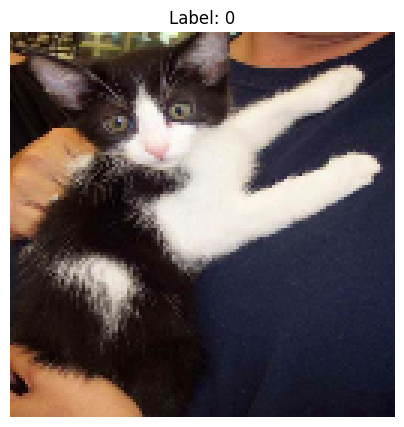

In [6]:
for images, labels in train_ds.take(1):
    plt.figure(figsize=(5,5))
    plt.imshow(images[0].numpy() / 255.)  # normalize if not already
    plt.title(f"Label: {int(labels[0])}")
    plt.axis('off')
    plt.show()
    break

In [7]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

model = Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation="relu"),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256,activation="relu"),
    Dense(128,activation="relu"),
    Dense(1,activation='softmax')
    
])

/Users/tharhtet/.local/share/virtualenvs/6_deep_learning-3jfSPIh1/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 59, 59, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 53824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    13,779,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,868,545 (52.90 MB)

 Trainable params: 13,868,545 (52.90 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_ds,epochs=EPOCHS, validation_data=val_ds,verbose=1)

Epoch 1/20


/Users/tharhtet/.local/share/virtualenvs/6_deep_learning-3jfSPIh1/lib/python3.11/site-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
2025-08-02 12:29:35.506724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.4923 - loss: 243.8678 - val_accuracy: 0.5036 - val_loss: 0.6856
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.4881 - loss: 0.7378 - val_accuracy: 0.5036 - val_loss: 11.0472
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.4937 - loss: 6.2515 - val_accuracy: 0.5036 - val_loss: 8.8631
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.4926 - loss: 4.0408 - val_accuracy: 0.5036 - val_loss: 9.5979
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.4926 - loss: 47.8169 - val_accuracy: 0.5036 - val_loss: 13.6757
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.4911 - loss: 42.9113 - val_accuracy: 0.5036 - val_loss: 12.8990
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.4876 - loss: 7.9305 - val_accuracy: 0.5036 - val_loss: 7.8705
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.4889 - loss: 5.9160 - val_accuracy: 0.5036 - val_l

In [ ]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5049 - loss: 458.2409
Validation Loss: 474.8554
Validation Accuracy: 0.5036


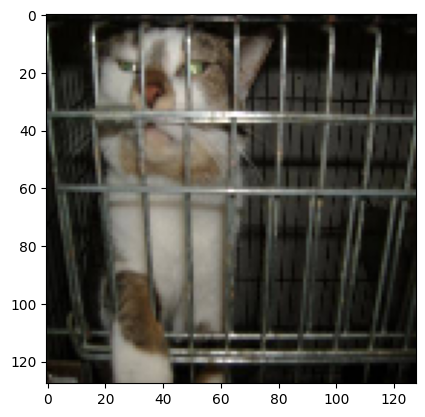

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r"/Users/tharhtet/Documents/github/Practical-ML-by-WAI/6_deep_learning/CNN/cats_and_dogs_filtered/test/cats/cat.2366.jpg"
img = image.load_img(img_path, target_size=input_img_size)
img_array = image.img_to_array(img)  # shape: (_, _, 3)
img_array = img_array / 255.0        # normalize
img_array = np.expand_dims(img_array, axis=0)  # shape: (1, _, _, 3)
plt.imshow(img_array[0])  # Display the image

In [ ]:
class_names = train_dataset.class_indices
print("Class names found:", class_names)

Class names found: {'cats': 0, 'dogs': 1}


In [ ]:
prediction = model.predict(img_array)[0][0]
class_name = "cats" if prediction > 0.5 else "dogs"
print(f"Predicted class: {class_name} with confidence {prediction:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted class: cats with confidence 1.00


### Model Saving

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

ML_Summer_School_ID = os.getenv('ML_Summer_School_ID')
print("Your Sudent ID is: " + ML_Summer_School_ID)

Your Sudent ID is: 12345678_THS


In [ ]:
model.save(f'./binary_classification/{ML_Summer_School_ID}_model.h5')

In [ ]:
import json
# Save class names to a text file
with open(f'./binary_classification/{ML_Summer_School_ID}_class_indices.json', 'w') as f:
    json.dump(train_ds.class_indices, f)
